# EDA Exploratory Data Analysis for Student performance prediction system.

#### 1 Problem Statement 
The project understands how the student performance is predicted by other variables like gender,ethinicity,parental level of education, Lunch and test preparation challenges

#### 2 Data collection

##### 2.1 Import data and required packages 

##### Import Pandas, Numpy, Matplotlib , and warings library 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

##### Import csv data using pd.readcsv()

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset information 

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


### 3 Check Dataset

 -> Check Missing values

 -> Check Duplicates 
 
 -> Check data type
 
 -> Check the number of unique values of each column 
 
 -> Check statistics of the dataset 
 
 -> Check various categories present in the different categorical column


##### 3.1 Check missing values 

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values 

#### 3.2 Check duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

No duplicate columns present in here

#### 3.3 Check NaN or Dtypes

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


#### 3.4 Checking the number of unique values in each columns

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Checking the statistics of the dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the data above:
 -> From the above description of numeric fields present in the dataset , all means are very close to each other-between 66 to 68

 -> Hence standard deviation are also close to each other - from 14.6 to 15.19

 -> Min score is very low to 0 in maths compared to reading and writing scores

 -> max score achieved is 77 in maths and 79 in other two which is again low merit 
 
 ( Sounds like students seems to perform low in maths)

#### 3.6 Check the various values present in the different categorical columns

In [12]:
category_cols = df.select_dtypes("str")
for cols in category_cols.columns:
    print(f"Categorical columns for {cols} variable :")
    print(f"{df[cols].unique()}")

Categorical columns for gender variable :
<StringArray>
['female', 'male']
Length: 2, dtype: str
Categorical columns for race_ethnicity variable :
<StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categorical columns for parental_level_of_education variable :
<StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categorical columns for lunch variable :
<StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categorical columns for test_preparation_course variable :
<StringArray>
['none', 'completed']
Length: 2, dtype: str


#### Separating the numerical columns and categorical columns

In [13]:
num_columns = df.select_dtypes("int64")
print(f"We have {len(category_cols.columns)} categorical columns: {category_cols.columns.tolist()}")
print(f"We have {len(num_columns.columns)} numerical columns: {num_columns.columns.tolist()}")

We have 5 categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have 3 numerical columns: ['math_score', 'reading_score', 'writing_score']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### Adding columns for other variables in analysis that are "Total_score" and "Average"

In [15]:
df["total_score"] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [16]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in Math: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in Math: 7


In [17]:
# low score student count
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()
print(f"Number of students with less than 20 score in reading: {reading_less_20}")
print(f"Number of students with less than 20 score in writing: {writing_less_20}")
print(f"Number of students with less than 20 score in math: {math_less_20}")



Number of students with less than 20 score in reading: 1
Number of students with less than 20 score in writing: 3
Number of students with less than 20 score in math: 4


Insights from the above data is:

-> Students who has perform worse in math

-> more students appear to be smarter in the reading


## Exploring Data (Visualization)

#### Histogram and KDE(Kernel Density Estimate )

In [18]:
import seaborn as sns

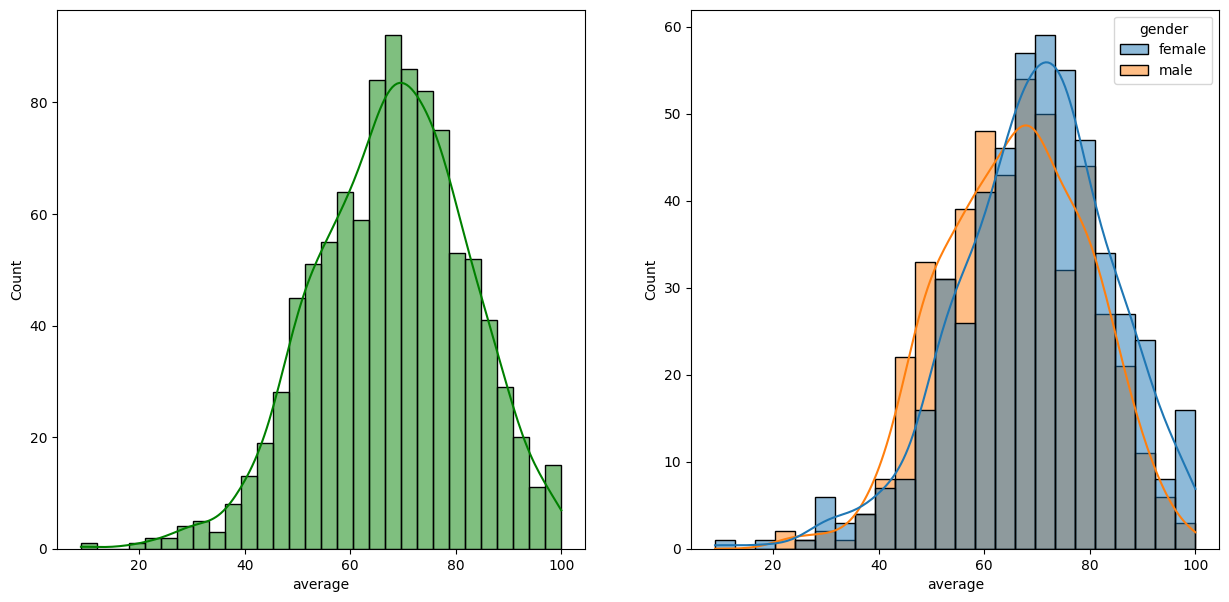

In [19]:
# Average score in histogram
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue='gender')
plt.show()



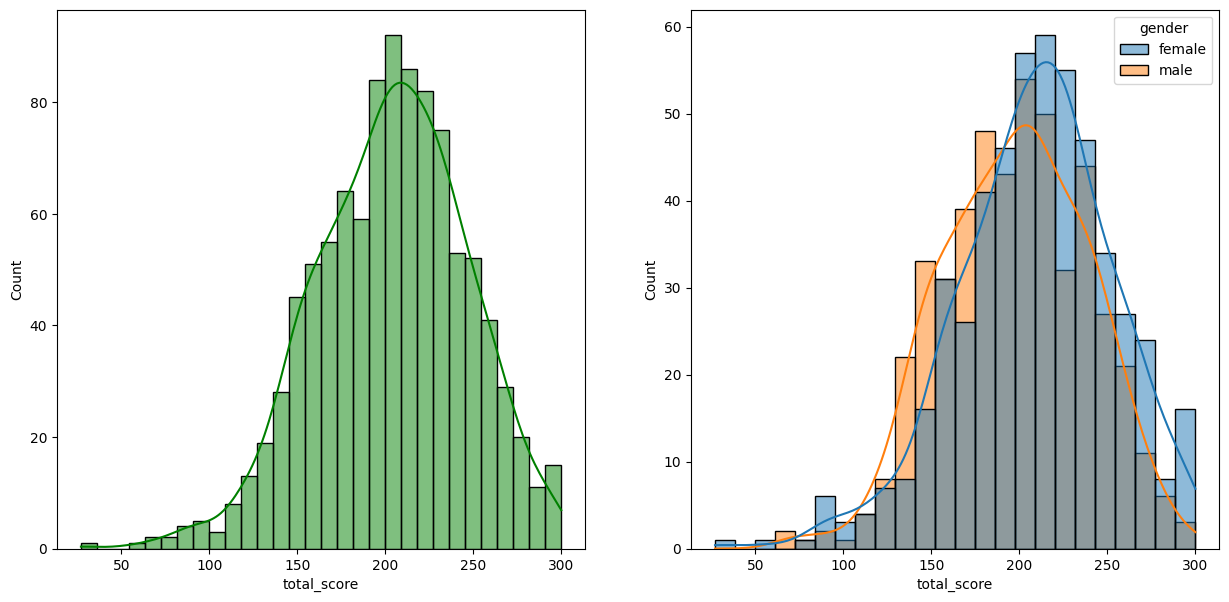

In [20]:
# Total score
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="total_score",kde=True,hue='gender')
plt.show()

Insights:

-> Female scores more than males

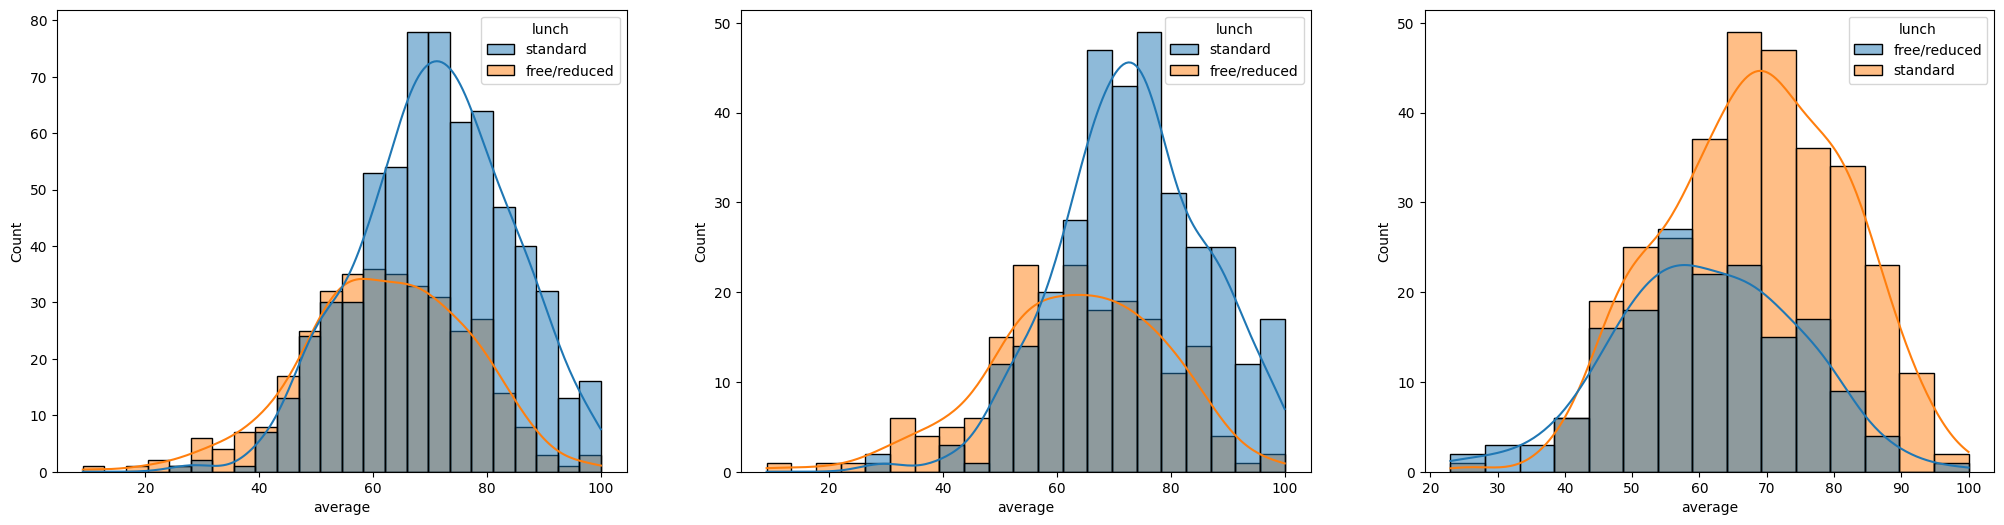

In [21]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',hue="lunch",kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='lunch',kde=True)
plt.show()

Insights from the above chart shows :
-> Standard lunch helps to perform well in the exams 

-> It helps to perform well whether for male or female

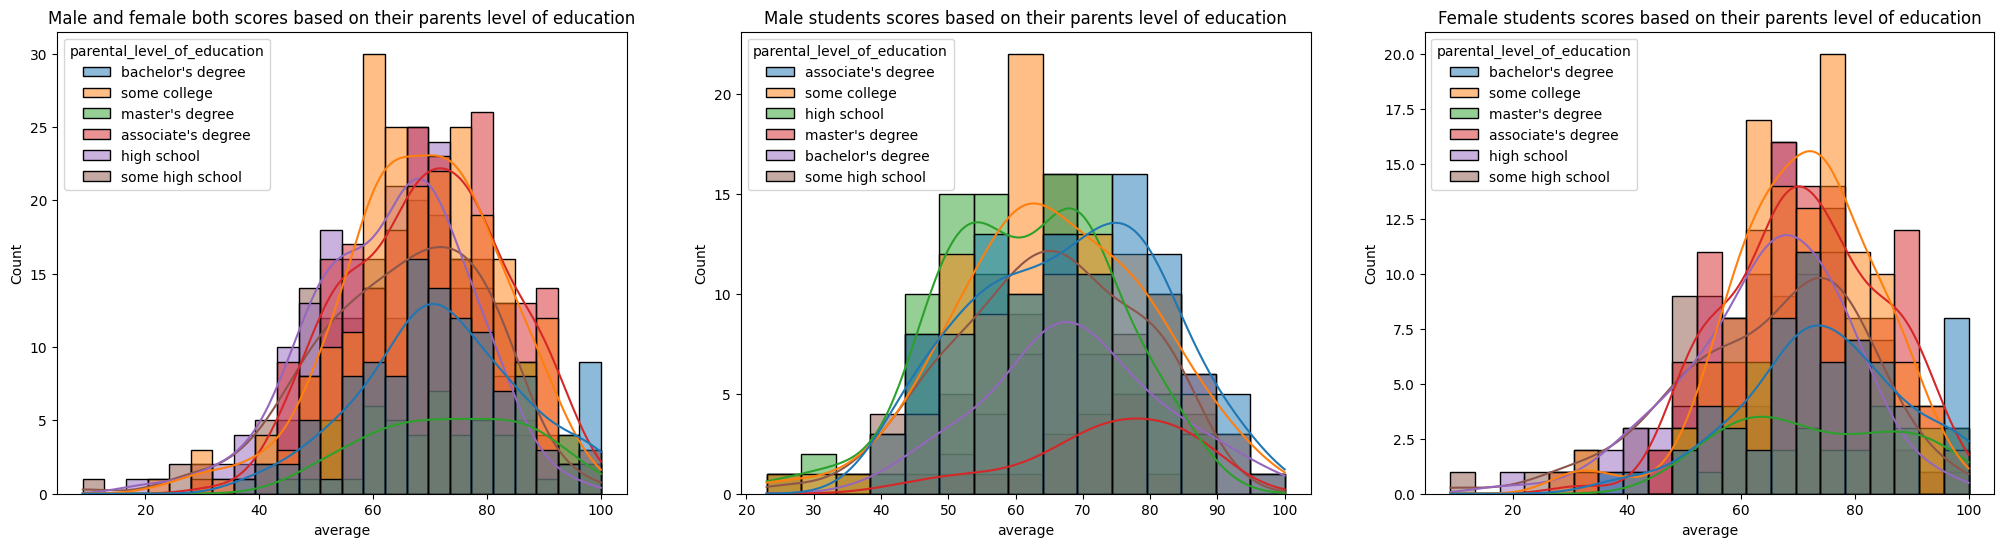

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="parental_level_of_education")
plt.title("Male and female both scores based on their parents level of education")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="parental_level_of_education",kde=True)
plt.title("Male students scores based on their parents level of education")
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue="parental_level_of_education",kde=True)
plt.title("Female students scores based on their parents level of education")
plt.show()

Insights : 

-> Most students score higher even when their parents studied from some college or have done masters. no impact as such of parental education


Text(0.5, 1.0, 'Female student score based on race')

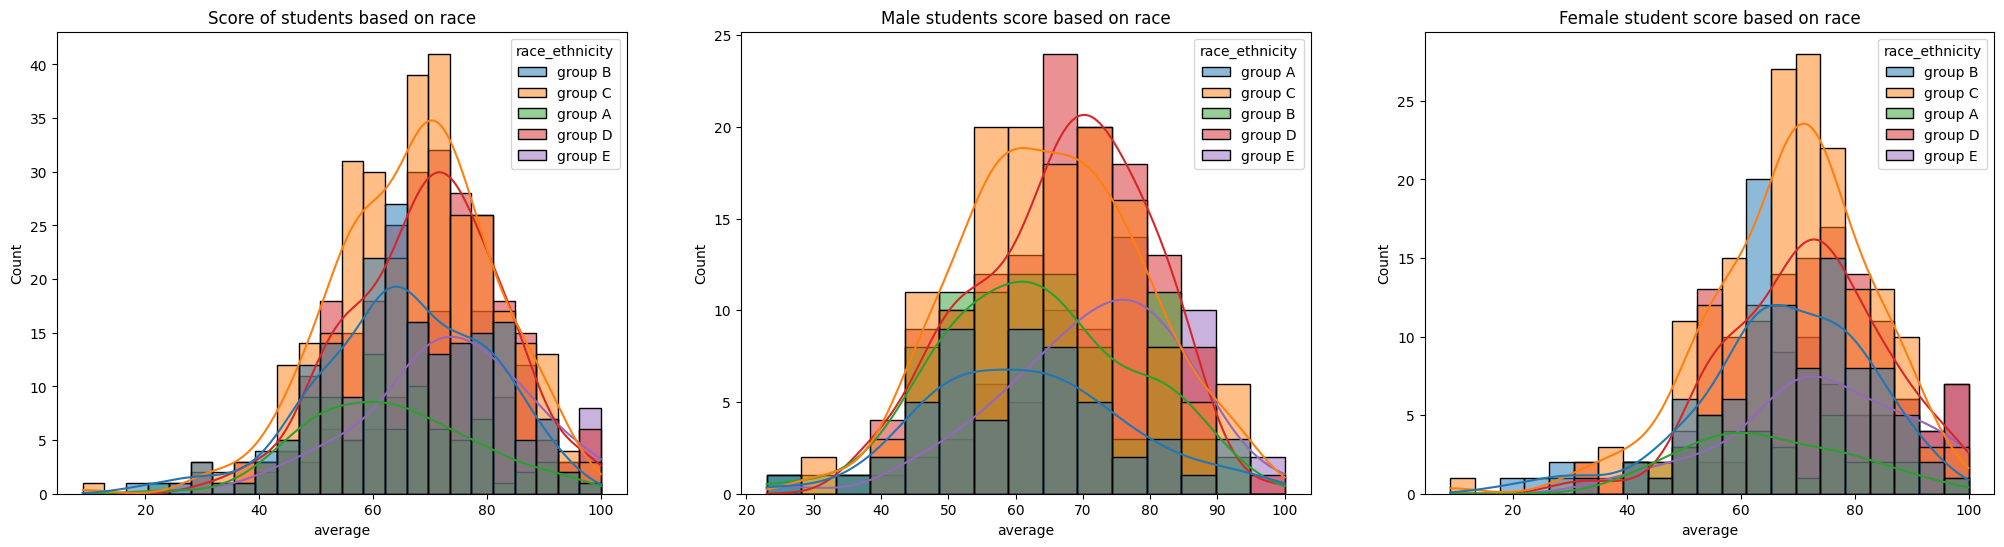

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='race_ethnicity',kde=True,color='g')
plt.title("Score of students based on race")
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='race_ethnicity',kde=True,color='o')
plt.title("Male students score based on race")
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='race_ethnicity',kde=True,color='y')
plt.title("Female student score based on race")

Insights :

-> From the first plot , overall there is no strong impact of race on students score maximum score achieved are of group C

-> From 2nd plot, Male students belongs to group D and C tend to score more 

->From 3rd plot, female students having group c and b tend to score more compared to other race but as such no impact has been seen in education of each race all are almost scoring equal

-> Students from group A and B especially in male B is weaker compared to female and group A is weak than all other races.

#### 4.2 Maximum Score of students in all three subjects 

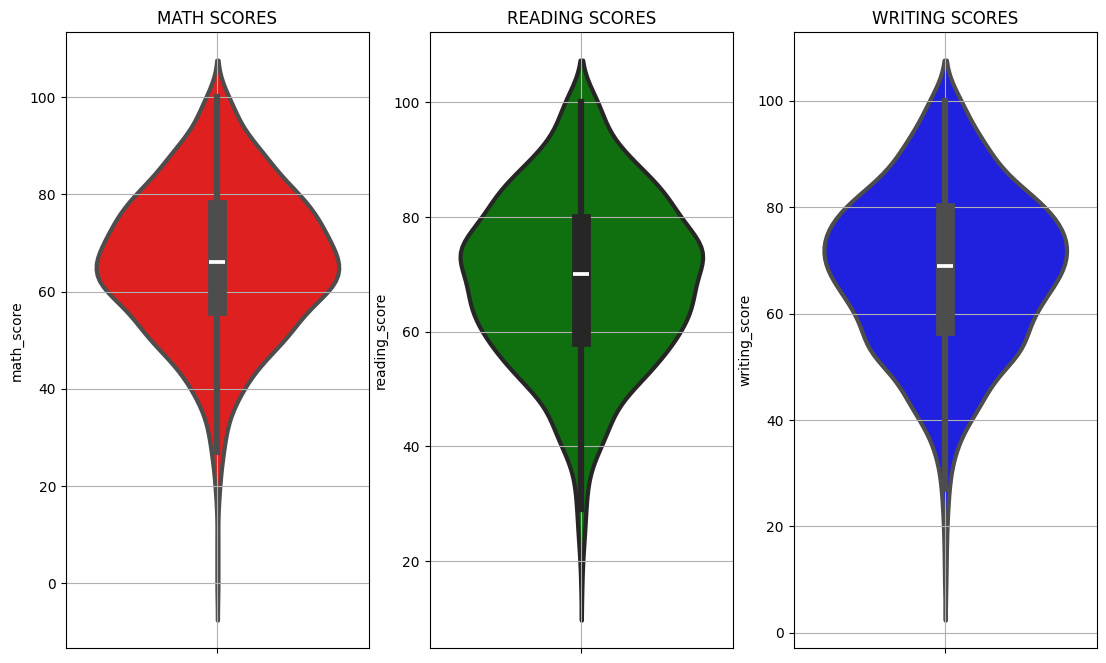

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.grid()
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.grid()
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.grid()
plt.show()

Insights:
-> It is evidence that most of the students score in math is in between 60-80 marks whereas score in reading and writing are ranging between 50-80

#### 4.3 Multivariate Analysis using pieplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

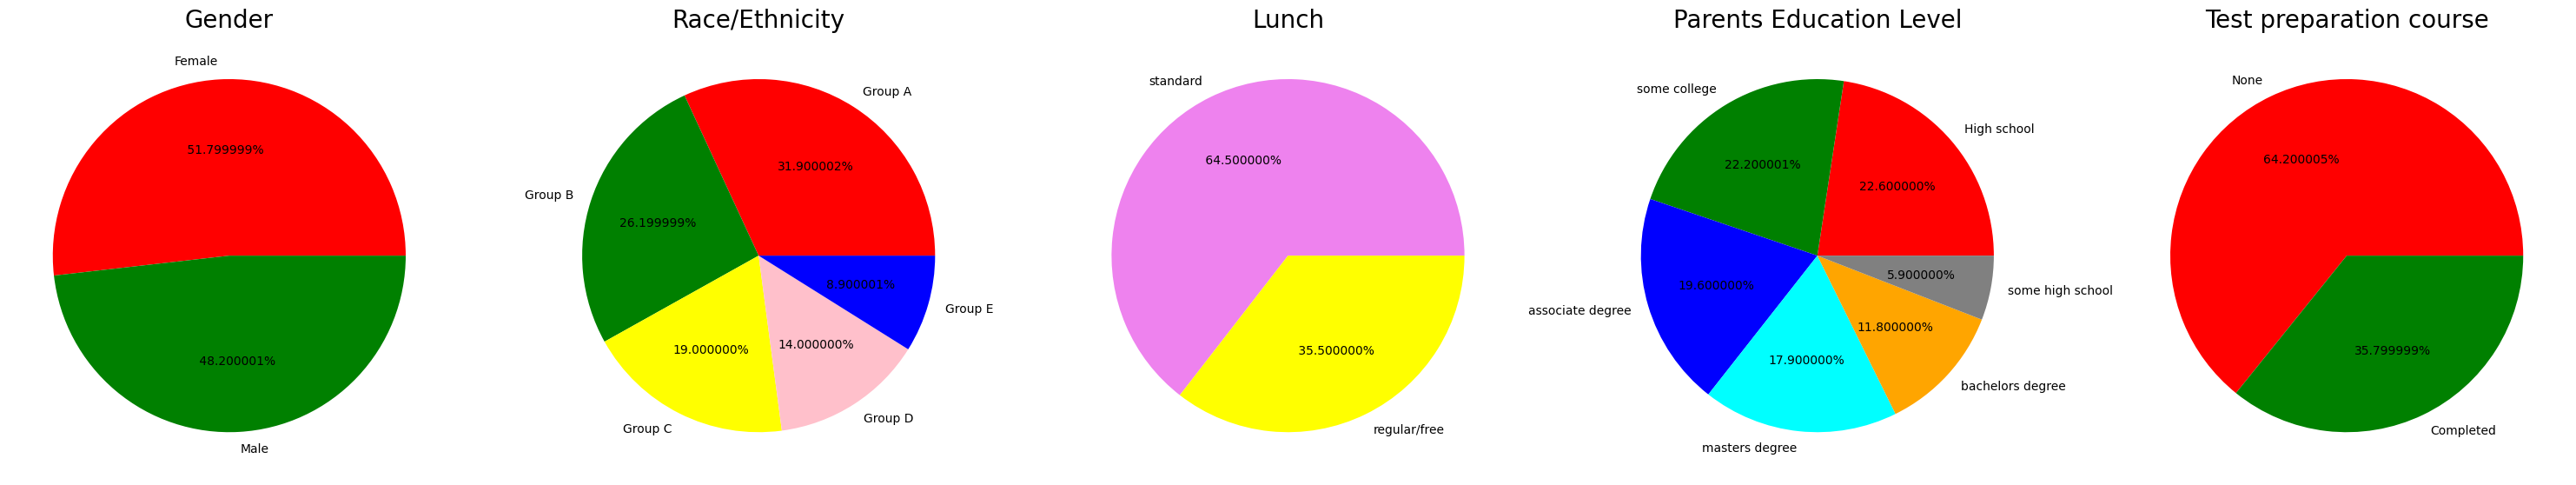

In [46]:
plt.rcParams['figure.figsize'] = (38,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=["Female","Male"]
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct=' %2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=['Group A','Group B','Group C','Group D','Group E']
color=['red','green','yellow','pink','blue']

plt.pie(size,colors=color,labels=labels,autopct="%2f%%")
plt.title("Race/Ethnicity",fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels=['standard','regular/free']
color=['violet','yellow']

plt.pie(size,labels=labels,colors=color,autopct=' %2f%%')
plt.title("Lunch",fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['parental_level_of_education'].value_counts()
labels=['High school','some college','associate degree','masters degree','bachelors degree','some high school']
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,labels=labels,colors=color,autopct="%2f%%")
plt.title("Parents Education Level",fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels=['None','Completed']
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Test preparation course',fontsize=20)
plt.axis('off')



In [45]:
category_cols['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64